In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = [18, 12]
rcParams['font.size'] = 22

In [3]:
data = [l.strip().split() for l in open('process/data.txt', 'r').readlines()]

In [4]:
data_linear = np.asarray([[float(d[0].split("_")[0]), float(d[1])] for d in data if 'interleave' not in d[0] and 'random' not in d[0]])
data_interleave = np.asarray([[float(d[0].split("_")[0]), float(d[1])] for d in data if 'interleave' in d[0]])
data_random = np.asarray([[float(d[0].split("_")[0]), float(d[1])] for d in data if 'random' in d[0]])

data_linear = data_linear[:, 0], data_linear[:, 1]
data_interleave = data_interleave[:, 0], data_interleave[:, 1]
data_random = data_random[:, 0], data_random[:, 1]

data_linear = data_linear[0][np.argsort(data_linear)[0]], data_linear[1][np.argsort(data_linear)[0]]
data_interleave = data_interleave[0][np.argsort(data_interleave)[0]], data_interleave[1][np.argsort(data_interleave)[0]]
data_random = data_random[0][np.argsort(data_random)[0]], data_random[1][np.argsort(data_random)[0]]

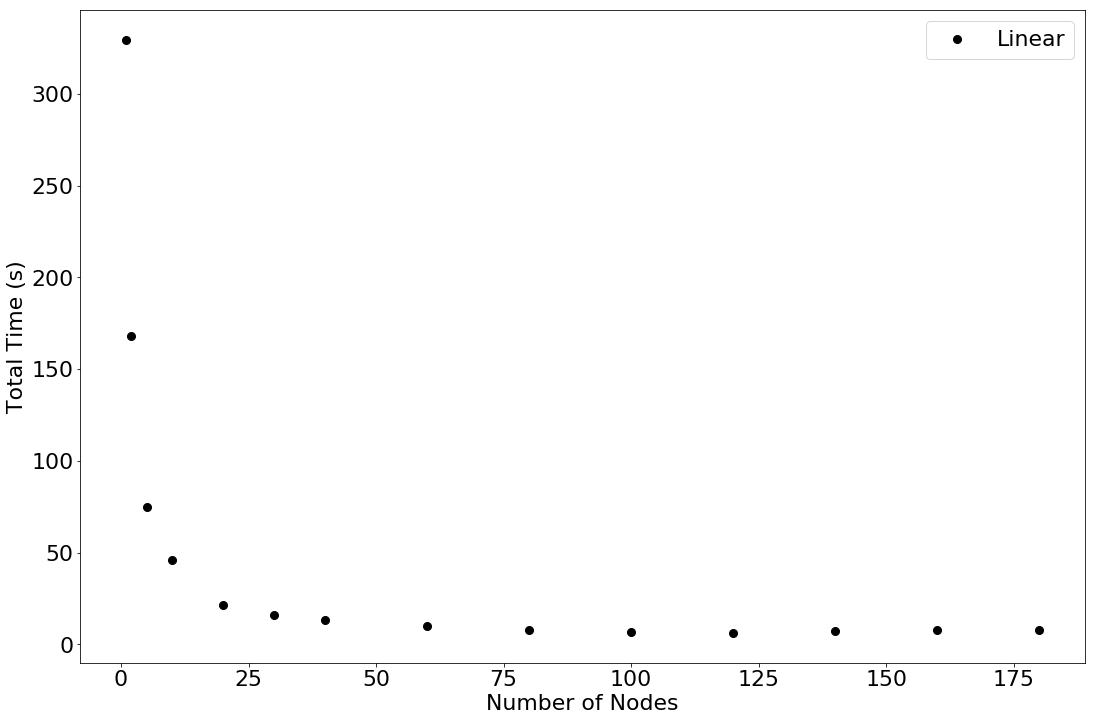

In [5]:
plt.plot(data_linear[0], data_linear[1], linestyle='None', marker='o', color='black', markersize=8, label='Linear')
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()

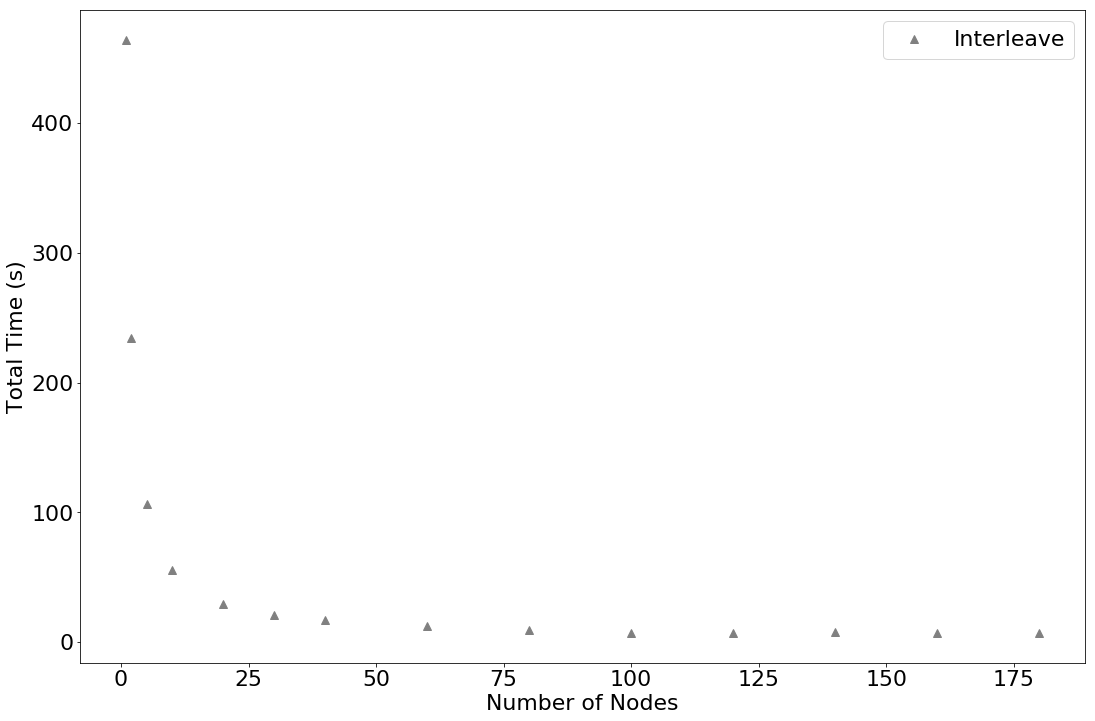

In [6]:
plt.plot(data_interleave[0], data_interleave[1], linestyle='None', marker='^', color='gray', markersize=8, label='Interleave')
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()

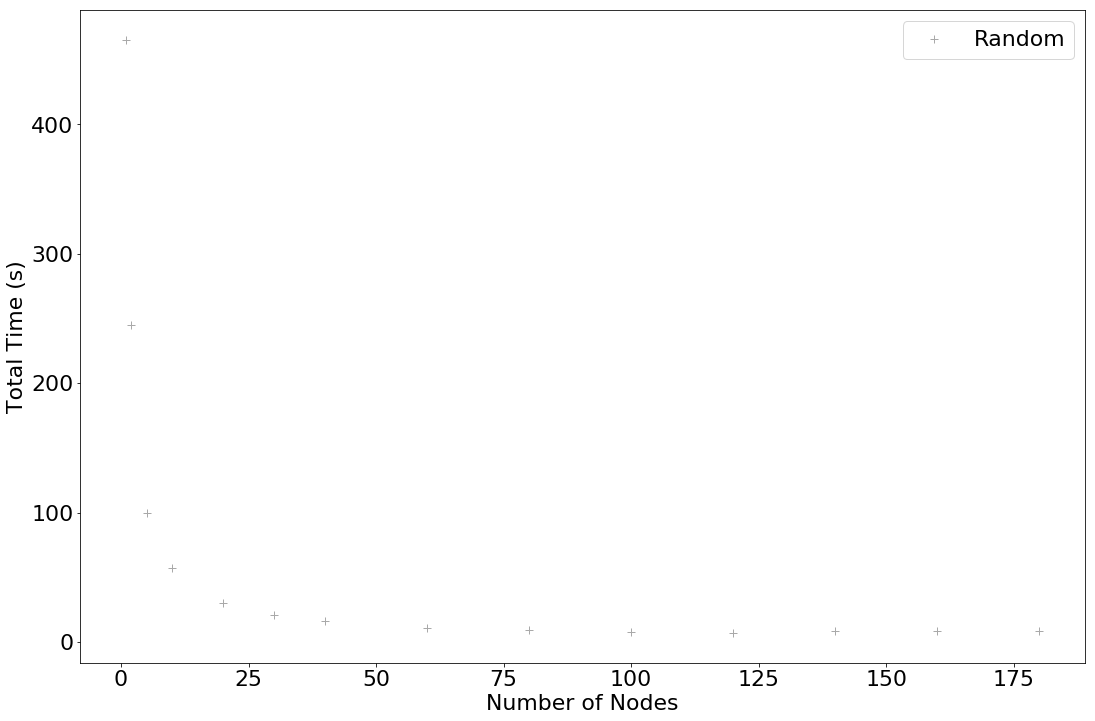

In [7]:
plt.plot(data_random[0], data_random[1], linestyle='None', marker='+', color='darkgray', markersize=8, label='Random')
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()

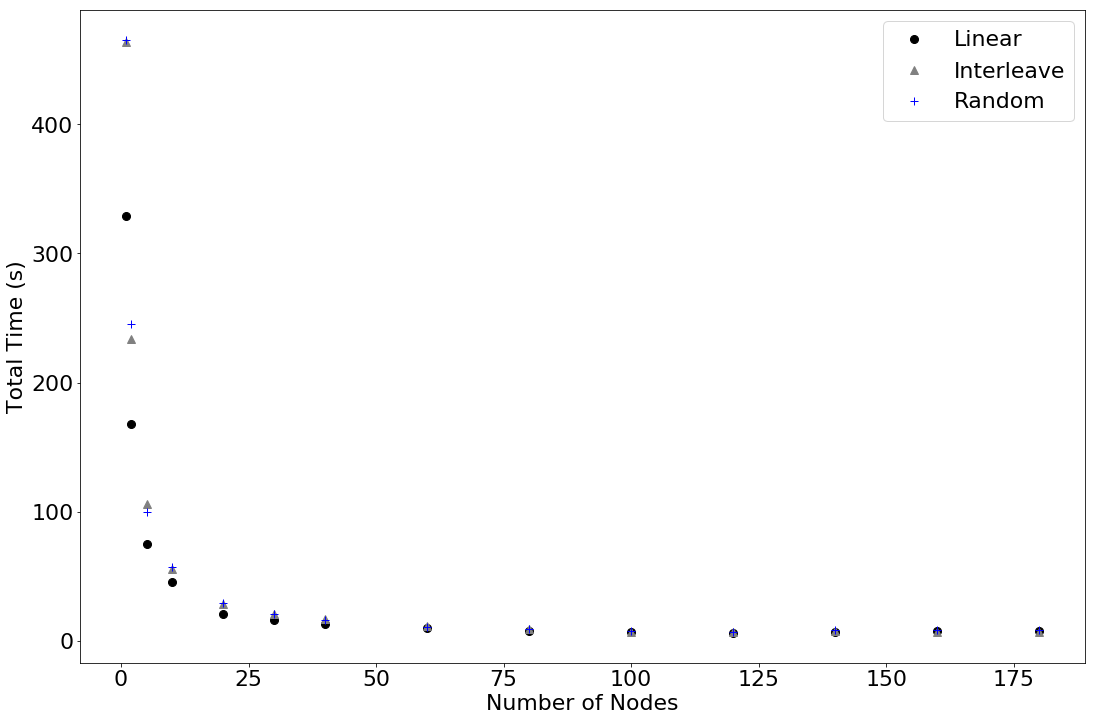

In [8]:
plt.plot(data_linear[0], data_linear[1], linestyle='None', marker='o', color='black', markersize=8, label='Linear')
plt.plot(data_interleave[0], data_interleave[1], linestyle='None', marker='^', color='gray', markersize=8, label='Interleave')
plt.plot(data_random[0], data_random[1], linestyle='None', marker='+', color='blue', markersize=8, label='Random')
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()

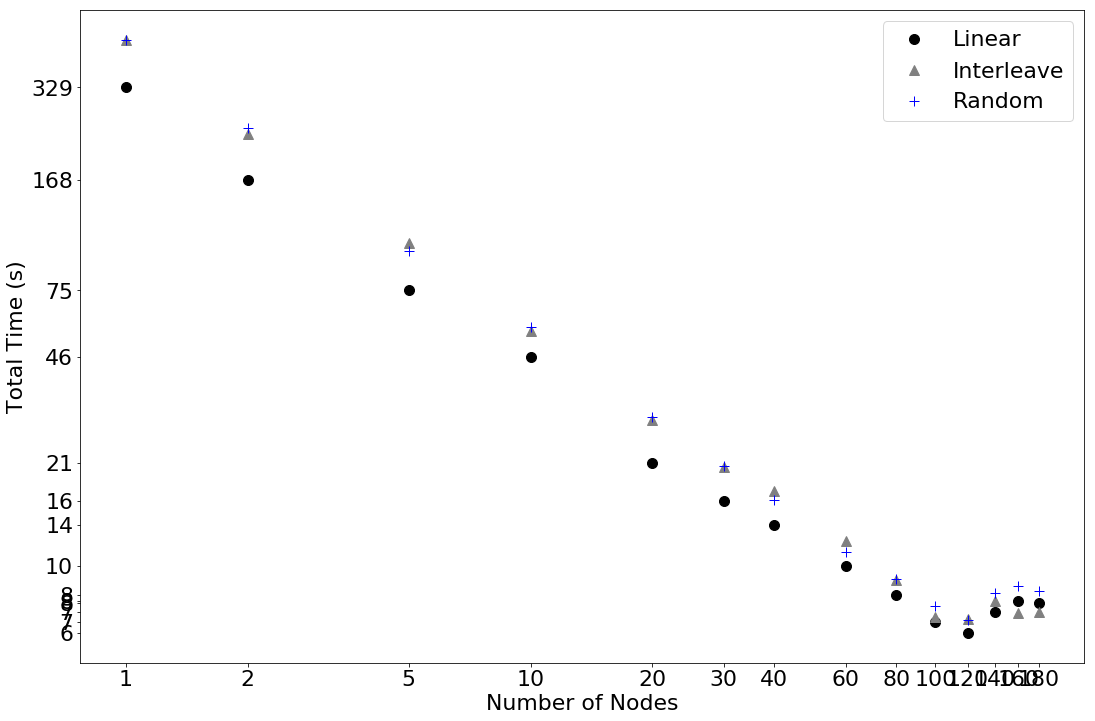

In [9]:
plt.plot(np.log(data_linear[0]), np.log(data_linear[1]), linestyle='None', marker='o', color='black', markersize=10, label='Linear')
plt.plot(np.log(data_interleave[0]), np.log(data_interleave[1]), linestyle='None', marker='^', color='gray', markersize=10, label='Interleave')
plt.plot(np.log(data_random[0]), np.log(data_random[1]), linestyle='None', marker='+', color='blue', markersize=10, label='Random')

plt.xticks(np.log(data_linear[0]), ["{:0.0f}".format(d) for d in data_linear[0]])
plt.yticks(np.log(data_linear[1]), ["{:0.0f}".format(d) for d in data_linear[1]])

plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")

plt.legend()
plt.show()

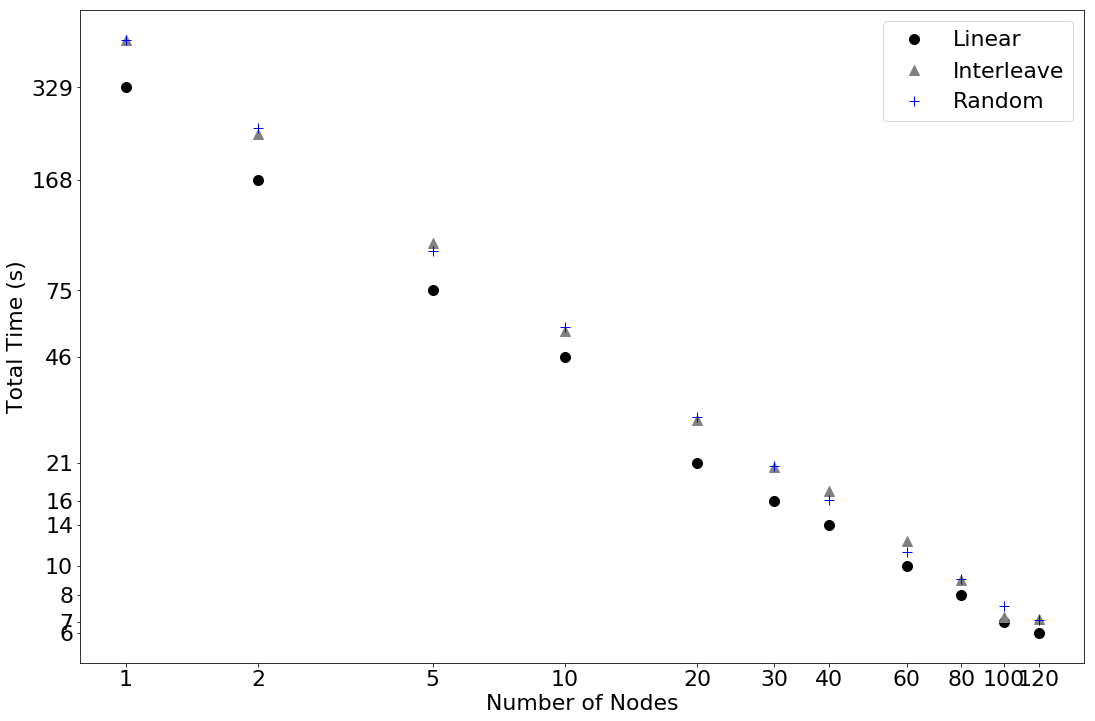

In [16]:
plt.plot(np.log(data_linear[0][:-3]), np.log(data_linear[1][:-3]), linestyle='None', marker='o', color='black', markersize=10, label='Linear')
plt.plot(np.log(data_interleave[0][:-3]), np.log(data_interleave[1][:-3]), linestyle='None', marker='^', color='gray', markersize=10, label='Interleave')
plt.plot(np.log(data_random[0][:-3]), np.log(data_random[1][:-3]), linestyle='None', marker='+', color='blue', markersize=10, label='Random')

plt.xticks(np.log(data_linear[0][:-3]), ["{:0.0f}".format(d) for d in data_linear[0][:-3]])
plt.yticks(np.log(data_linear[1][:-3]), ["{:0.0f}".format(d) for d in data_linear[1][:-3]])

plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")

plt.legend()
plt.show()

In [11]:
data_linear = data_linear[0][np.argsort(data_linear)[0]], data_linear[1][np.argsort(data_linear)[0]]

In [28]:
result = linregress(np.log10(data_linear[0][:-3]), np.log10(data_linear[1][:-3]))
data_linear_slope = result.slope
data_linear_inter = result.intercept
print(data_linear_slope, data_linear_inter)

-0.833093789587 2.47711303685


In [29]:
result = linregress(np.log10(data_interleave[0][:-3]), np.log10(data_interleave[1][:-3]))
data_interleave_slope = result.slope
data_interleave_inter = result.intercept
print(data_interleave_slope, data_interleave_inter)

-0.888000192702 2.64502435192


In [30]:
result = linregress(np.log10(data_random[0][:-3]), np.log10(data_random[1][:-3]))
data_random_slope = result.slope
data_random_inter = result.intercept
print(data_random_slope, data_random_inter)

-0.890155962821 2.64689634047


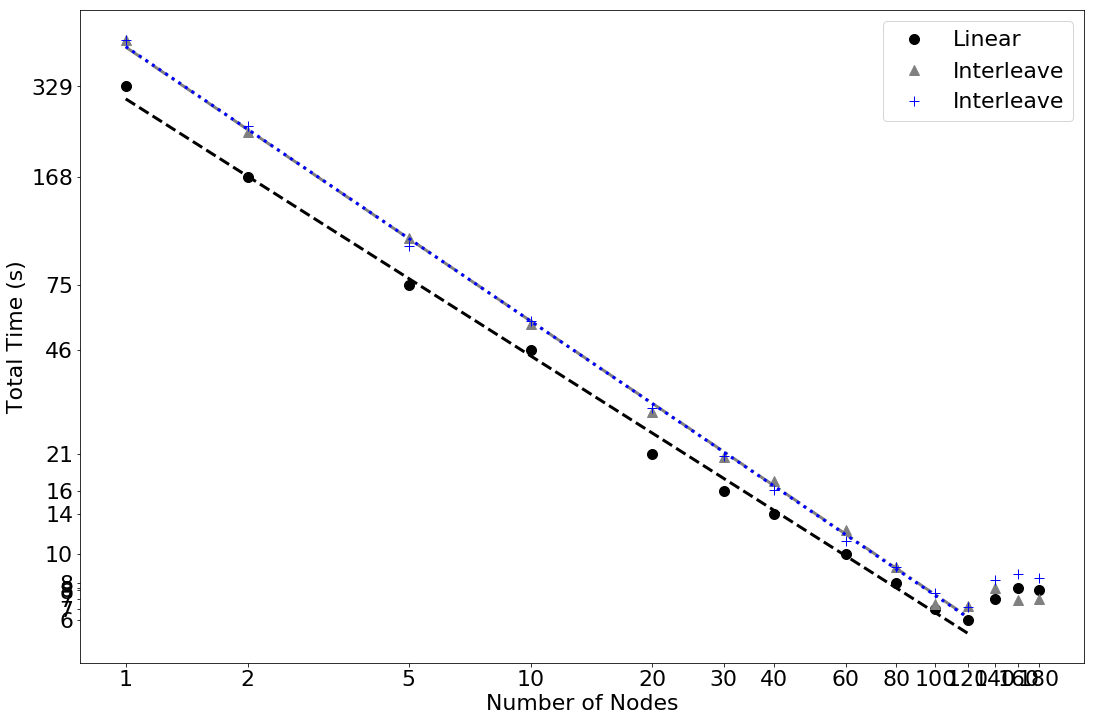

In [31]:
x_line = np.linspace(1, 120, 1000)

plt.plot(np.log10(data_linear[0]), np.log10(data_linear[1]), linestyle='None', marker='o', color='black', markersize=10, label='Linear')
plt.plot(np.log10(x_line), data_linear_slope * np.log10(x_line) + data_linear_inter, linestyle='--', color='k', linewidth=3)

plt.plot(np.log10(data_interleave[0]), np.log10(data_interleave[1]), linestyle='None', marker='^', color='gray', markersize=10, label='Interleave')
plt.plot(np.log10(x_line), data_interleave_slope * np.log10(x_line) + data_interleave_inter, linestyle='-.', color='gray', linewidth=3)

plt.plot(np.log10(data_random[0]), np.log10(data_random[1]), linestyle='None', marker='+', color='blue', markersize=10, label='Interleave')
plt.plot(np.log10(x_line), data_random_slope * np.log10(x_line) + data_random_inter, linestyle=':', color='blue', linewidth=3)

plt.xticks(np.log10(data_linear[0]), ["{:0.0f}".format(d) for d in data_linear[0]])
plt.yticks(np.log10(data_linear[1]), ["{:0.0f}".format(d) for d in data_linear[1]])
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()

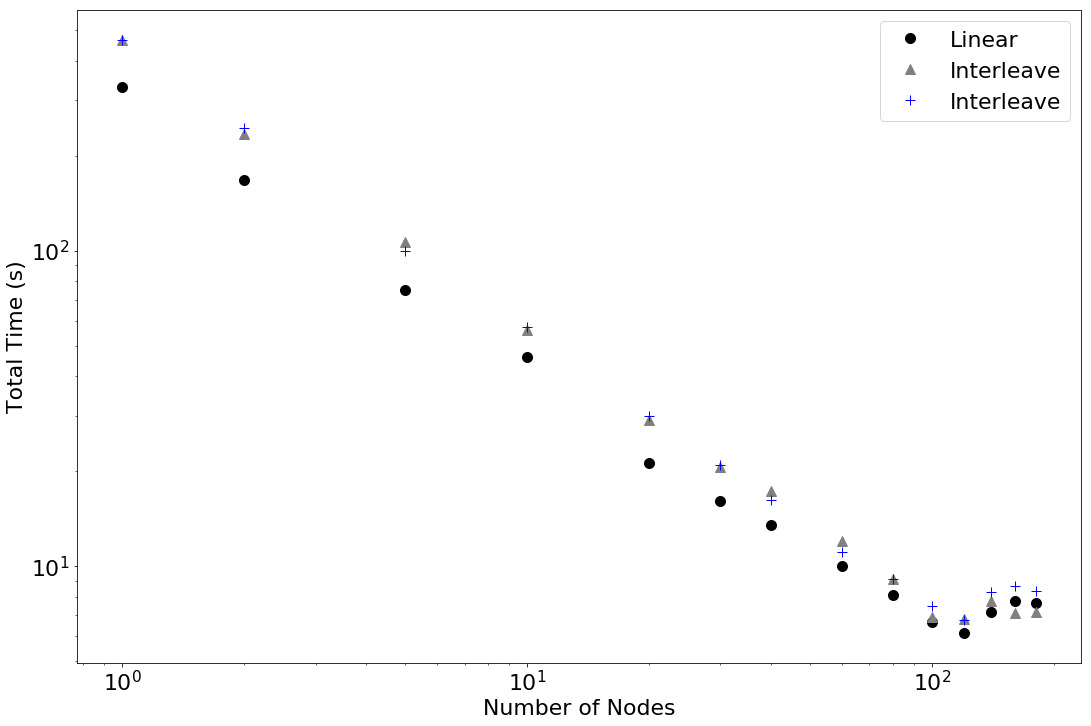

In [26]:
x_line = np.linspace(1, 120, 1000)

plt.loglog(data_linear[0], data_linear[1], linestyle='None', marker='o', color='black', markersize=10, label='Linear')
# plt.plot(np.log10(x_line), data_linear_slope * np.log10(x_line) + data_linear_inter, linestyle='--', color='k', linewidth=3)

plt.loglog(data_interleave[0], data_interleave[1], linestyle='None', marker='^', color='gray', markersize=10, label='Interleave')
# plt.plot(np.log10(x_line), data_interleave_slope * np.log10(x_line) + data_interleave_inter, linestyle='-.', color='gray', linewidth=3)

plt.loglog(data_random[0], data_random[1], linestyle='None', marker='+', color='blue', markersize=10, label='Interleave')
# plt.plot(np.log10(x_line), data_random_slope * np.log10(x_line) + data_random_inter, linestyle=':', color='blue', linewidth=3)

# plt.xticks(np.log10(data_linear[0]), ["{:0.0f}".format(d) for d in data_linear[0]])
# plt.yticks(np.log10(data_linear[1]), ["{:0.0f}".format(d) for d in data_linear[1]])
plt.xlabel("Number of Nodes")
plt.ylabel("Total Time (s)")
plt.legend()
plt.show()